# **Proposta de Trabalho 1 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Alunos:** Carlos Henrique Brito Malta Leão | Vinícius Alves de Faria Resende
### **Matrículas:** 2021039794 | 2021039972

### **Tema:** ENEM 2022: O Impacto das Características Socioeconômicas no Desempenho dos Candidatos
### **Base de dados:** https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem


In [1]:
# Bibliotecas usadas no projeto
import pandas as pd
import matplotlib.pyplot as plt

##**2. Data understanding (Entendimento dos dados)**


In [2]:
# Carregando a base de dados
raw_df = pd.read_csv('MICRODADOS_ENEM_2022.csv', encoding='latin-1', sep=';')

In [3]:
# Dada as colunas de interesse, selecionamos apenas as colunas que serão usadas no projeto
columns_of_interest = ['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ESCOLA', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']

DF = raw_df.filter(columns_of_interest)

In [4]:
# Adiciona uma coluna com a média das notas de cada participante
DF['NU_NOTA_MEDIA'] = (DF['NU_NOTA_CN'] + DF['NU_NOTA_CH'] + DF['NU_NOTA_LC'] + DF['NU_NOTA_MT'] + DF['NU_NOTA_REDACAO']) / 5

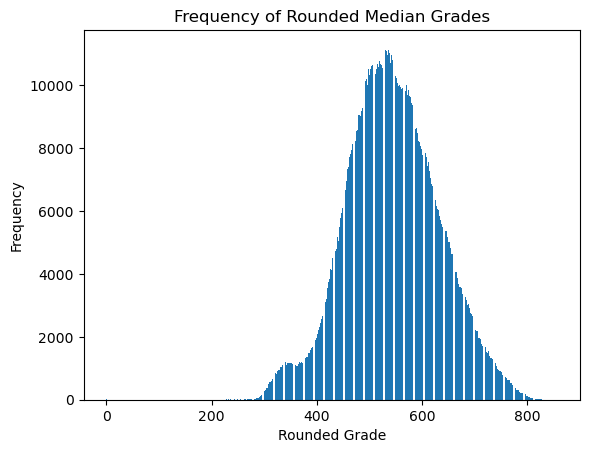

In [5]:
# Exibe a distribuição das notas médias
filtered_df = DF[DF['NU_NOTA_MEDIA'].notna()]
grade_counts = filtered_df['NU_NOTA_MEDIA'].round().astype(int).value_counts().sort_index()
plt.bar(grade_counts.index, grade_counts.values)

plt.xlabel('Rounded Grade')
plt.ylabel('Frequency')
plt.title('Frequency of Rounded Median Grades')

plt.show()

In [6]:
# Encontra a nota de corte das segmentações pré definidas
top_1_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.99)
print('Nota de corte do top 1%: ' + str(top_1_percent_grade))

top_25_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.75)
print('Nota de corte do top 25%: ' + str(top_25_percent_grade))

top_50_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.5)
print('Nota de corte do top 50%: ' + str(top_50_percent_grade))

top_75_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.25)
print('Nota de corte do top 75%: ' + str(top_75_percent_grade))

lowest_valid_grade = filtered_df['NU_NOTA_MEDIA'].round().loc[lambda x: x > 0].min()
print("Nota de corte do top 100%: " + str(lowest_valid_grade))

Nota de corte do top 1%: 750.0
Nota de corte do top 25%: 602.0
Nota de corte do top 50%: 541.0
Nota de corte do top 75%: 485.0
Nota de corte do top 100%: 56.0


In [7]:
# Adiciona uma coluna com o valor categórico de acordo com a nota média

# A -> 1%
# B -> 2% - 25%
# C -> 26% - 50%
# D -> 51% - 75%
# E -> 76% - 100%

def map_num_grade_to_categorical(grade):
  if grade >= top_1_percent_grade:
    return 'A'
  elif grade >= top_25_percent_grade:
    return 'B'
  elif grade >= top_50_percent_grade:
    return 'C'
  elif grade >= top_75_percent_grade:
    return 'D'
  elif grade >= lowest_valid_grade:
    return 'E'
  else:
    return 'F'

DF['TP_NOTA_MEDIA'] = DF['NU_NOTA_MEDIA'].round().apply(map_num_grade_to_categorical)


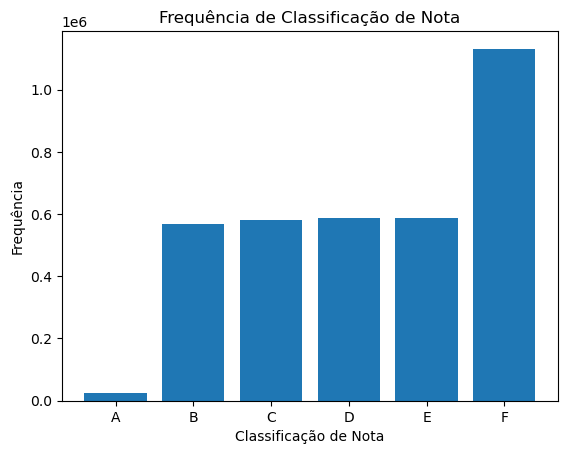

In [9]:
# Exibe a distribuição das classificações de notas
grade_counts = DF['TP_NOTA_MEDIA'].value_counts().sort_index()

plt.bar(grade_counts.index, grade_counts.values)

plt.xlabel('Classificação de Nota')
plt.ylabel('Frequência')
plt.title('Frequência de Classificação de Nota')

plt.show()

Não presentes ou eliminados ciências da natureza:  1120710
Não presentes ou eliminados ciências humanas:  982663
Não presentes ou eliminados linguagens e códigos:  982663
Não presentes ou eliminados matemática:  1120710
Não presentes ou eliminados em todas as provas:  972091


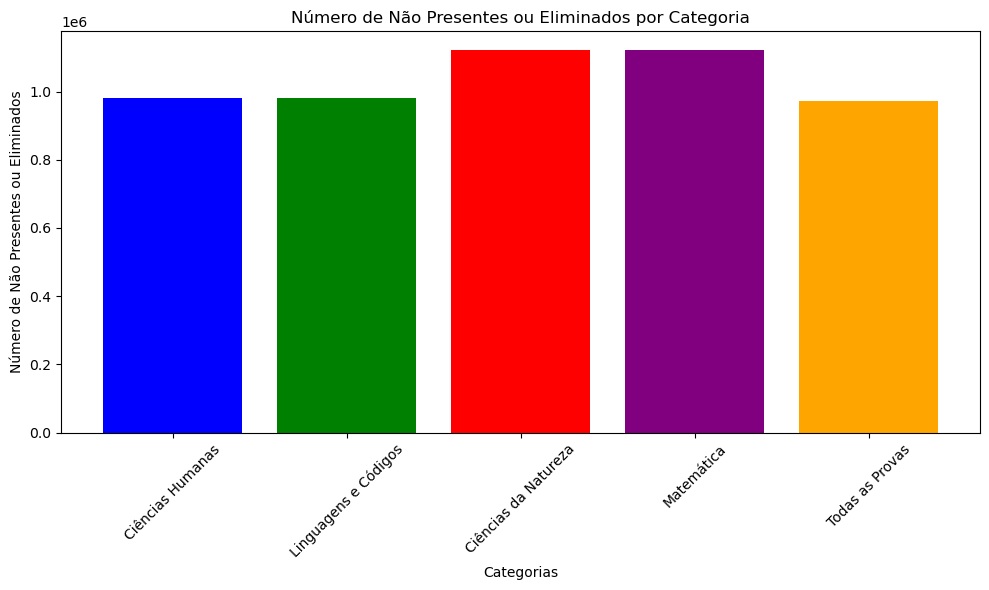

In [12]:
# Verifica a não presença ou eliminação de participantes
mask_cn = (DF['TP_PRESENCA_CN'] == 2) | (DF['TP_PRESENCA_CN'] == 0)
mask_ch = (DF['TP_PRESENCA_CH'] == 2) | (DF['TP_PRESENCA_CH'] == 0)
mask_lc = (DF['TP_PRESENCA_LC'] == 2) | (DF['TP_PRESENCA_LC'] == 0)
mask_mt = (DF['TP_PRESENCA_MT'] == 2) | (DF['TP_PRESENCA_MT'] == 0)

mask_combined = mask_cn & mask_ch & mask_lc & mask_mt

count_cn = mask_cn.sum()
count_ch = mask_ch.sum()
count_lc = mask_lc.sum()
count_mt = mask_mt.sum()

count_combined = mask_combined.sum()

print("Não presentes ou eliminados ciências da natureza: ", count_cn)
print("Não presentes ou eliminados ciências humanas: ", count_ch)
print("Não presentes ou eliminados linguagens e códigos: ", count_lc)
print("Não presentes ou eliminados matemática: ", count_mt)
print("Não presentes ou eliminados em todas as provas: ", count_combined)

# Dados
categories = ['Ciências Humanas', 'Linguagens e Códigos', 'Ciências da Natureza', 'Matemática', 'Todas as Provas']
counts = [count_ch, count_lc, count_cn, count_mt, count_combined]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Categorias')
plt.ylabel('Número de Não Presentes ou Eliminados')
plt.title('Número de Não Presentes ou Eliminados por Categoria')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()



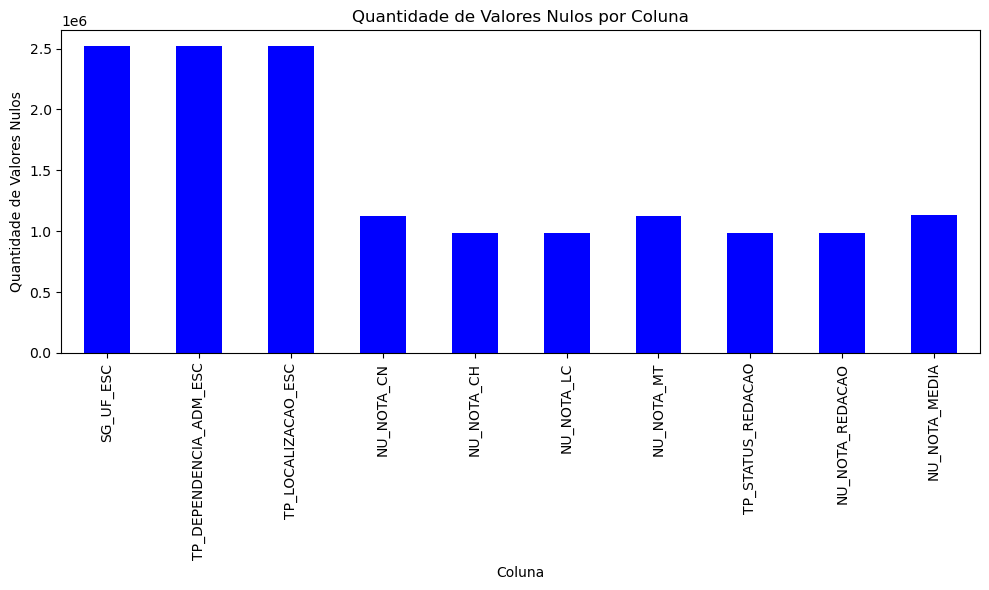

In [14]:
# Exibe a quantidade de valores nulos de cada coluna
null_counts = DF.isnull().sum()
null_counts = null_counts[null_counts > 0]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='blue')
plt.xlabel('Coluna')
plt.ylabel('Quantidade de Valores Nulos')
plt.title('Quantidade de Valores Nulos por Coluna')

# Exibir o gráfico
plt.tight_layout()
plt.show()

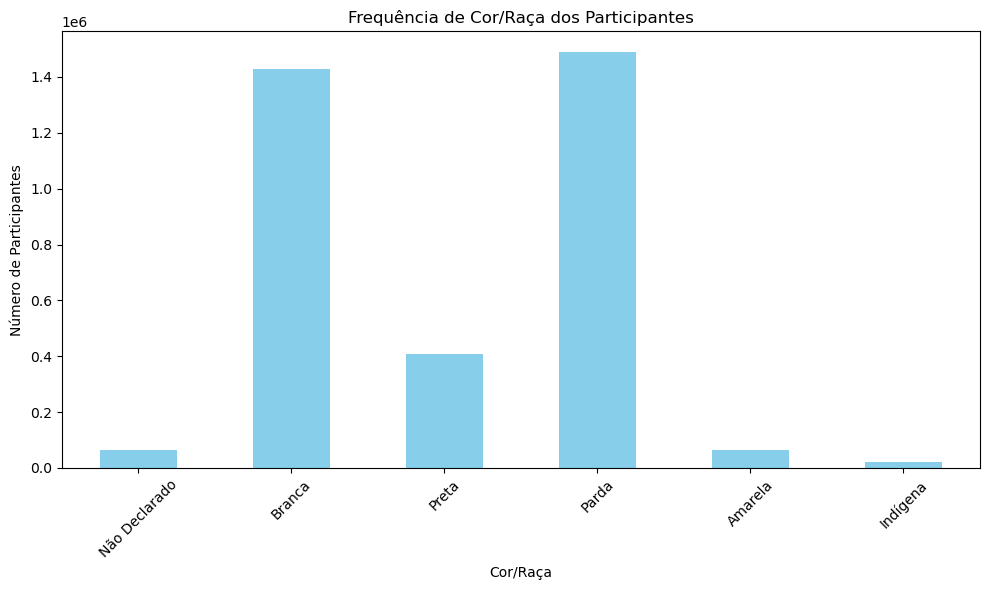

In [18]:
# Calcular a frequência de cor/raça dos participantes
cor_raca_dict = {
    0: 'Não Declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena'
}
cor_raca_counts = DF['TP_COR_RACA'].value_counts().sort_index()
cor_raca_counts.index = cor_raca_counts.index.map(cor_raca_dict)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
cor_raca_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cor/Raça')
plt.ylabel('Número de Participantes')
plt.title('Frequência de Cor/Raça dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

F    2120519
M    1355586
Name: TP_SEXO, dtype: int64


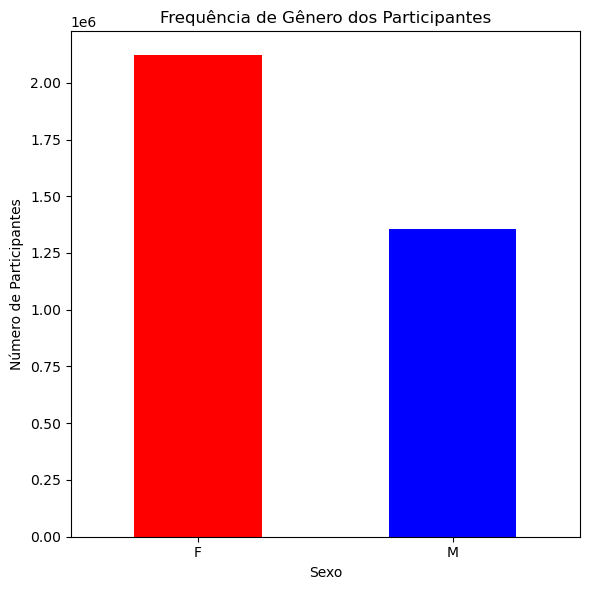

In [22]:
sexo_counts = DF['TP_SEXO'].value_counts()
print(sexo_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
sexo_counts.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('Sexo')
plt.ylabel('Número de Participantes')
plt.title('Frequência de Gênero dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Não Respondeu    2158545
Pública          1105355
Privada           212205
Name: TP_ESCOLA, dtype: int64


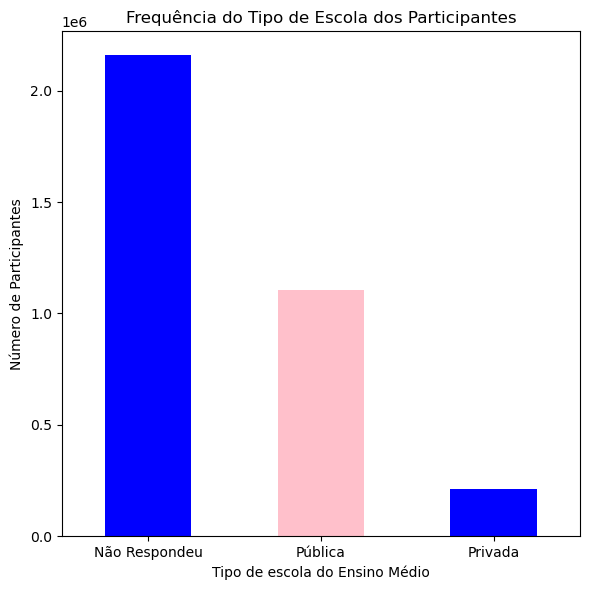

In [24]:
escola_dict = {
    1: 'Não Respondeu',
    2: 'Pública',
    3: 'Privada',
}

escola_counts = DF['TP_ESCOLA'].value_counts().sort_index()
escola_counts.index = escola_counts.index.map(escola_dict)
print(escola_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
escola_counts.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Tipo de escola do Ensino Médio')
plt.ylabel('Número de Participantes')
plt.title('Frequência do Tipo de Escola dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Não                    1786665
Sim, um                1324150
Sim, dois               317544
Sim, três                39075
Sim, quatro ou mais       8671
Name: Q010, dtype: int64


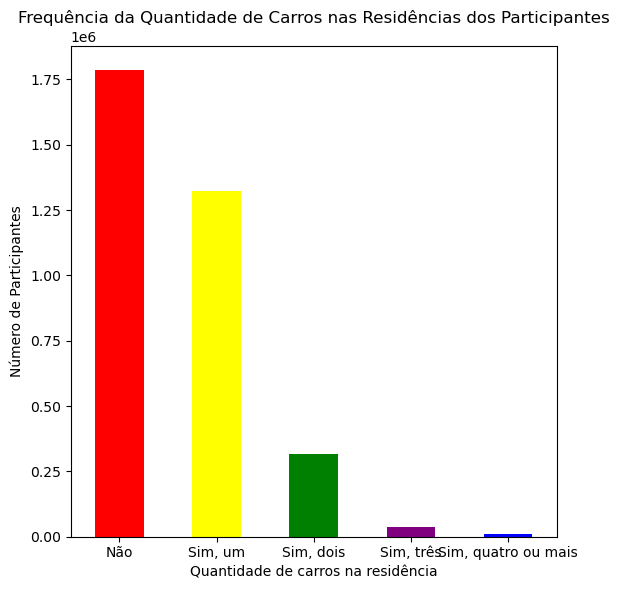

In [30]:
carro_dict = {
    'A': 'Não',
    'B': 'Sim, um',
    'C': 'Sim, dois',
    'D': 'Sim, três',
    'E': 'Sim, quatro ou mais',
}

carro_counts = DF['Q010'].value_counts().sort_index()
carro_counts.index = carro_counts.index.map(carro_dict)
print(carro_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
carro_counts.plot(kind='bar', color=['red', 'yellow', 'green', 'purple', 'blue'])
plt.xlabel('Quantidade de carros na residência')
plt.ylabel('Número de Participantes')
plt.title('Frequência da Quantidade de Carros nas Residências dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Não     326373
Sim    3149732
Name: Q025, dtype: int64


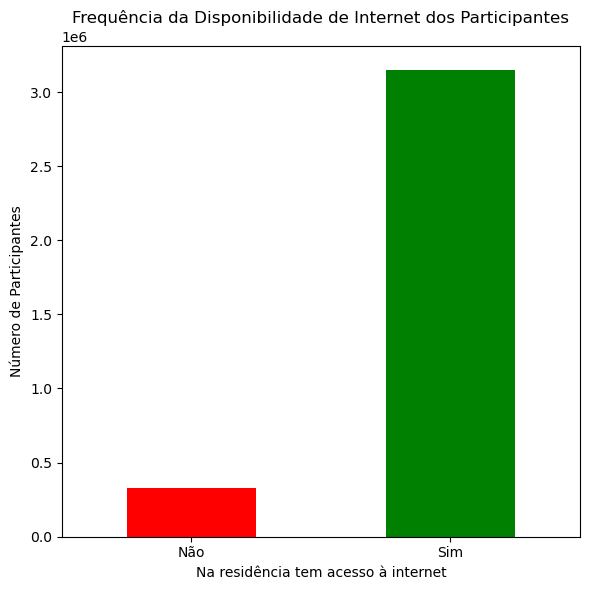

In [32]:
internet_dict = {
    'A': 'Não',
    'B': 'Sim',
}

internet_counts = DF['Q025'].value_counts().sort_index()
internet_counts.index = internet_counts.index.map(internet_dict)
print(internet_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
internet_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Na residência tem acesso à internet')
plt.ylabel('Número de Participantes')
plt.title('Frequência da Disponibilidade de Internet dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##**3. Data preparation (Preparação dos dados)**

##**4. Modeling (Modelagem)**


1.   Explicar brevemente como você elaborou o modelo para o seus dados.
2.   Se a intenção for fazer uma análise comparativa entre algorimtmos criar células markdown ou comentários explicitando onde começa o código referente a cada algoritmo.
3. Explicar (quando pertinente) o fluxo de dados, ou seja como você organizou os dados em treino e teste, como foi o ajuste de parâmetros e eventuais decisões de projeto referentes a modelagem de dados. **Que ajudem a compreender o código.**

O relatório deverá conter essas informações, mas sob a **perspectiva do projeto de dados**

##**5. Evaluation (Validação)**


**Prevenção de falhas**
(Opcional)


Se o seu dataset for muito grande ou muito grande, ou for muito custoso rodar os algoritmos é indicado que tenha uma célula na qual os resultados parciais possam ser salvos. Evitando, assim ter que re-rodar os algoritmos novamente.